## The cost of milk to make cheese
Your first task is to determine the annual cost of milk needed to produce cheddar cheese over the past five years. </p>
<p>You have been provided with three datasets. <em><strong>Please note that 1000 kg = 1 metric tonne.</strong></em></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:16px"><b>datasets/milk_prices.csv - The monthly prices, volume, protein percentage and butterfat percentage of milk </b>
    </div>
Source: <a href="https://environment.data.gov.uk/linked-data/cube/explore?uri=http%3A%2F%2Fenvironment.data.gov.uk%2Flinked-data%2Fcatalog%2Fdatasets%2Fentry%2Fmilk-prices-and-composition-of-milk-annual-statistics&filters-drawer=closed">Defra Data Services Platform</a>
<ul>
    <li><b>Time: </b>The month and year when the value was recorded.</li>
    <li><b>Measure Type: </b>The type of measure recorded.</li>
    <li><b>Price:</b> The price of milk (in Pounds per liter).</li>
    <li><b>Volume:</b> The amount of milk produced (in million liters).</li>
    <li><b>Protein:</b> The protein content of the milk (percentage).</li>
    <li><b>Butterfat:</b> The butterfat content of the milk (percentage).</li>
    <li><b>Unit of Measure:</b> The units specific to the measure type.</li>
</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/Milk_products_production.csv - The monthly production figures of milk, cream and cheddar cheese</b>
    </div>
Source: <a href="https://www.gov.uk/government/statistics/milk-utilisation-by-dairies-in-england-and-wales">GOV.UK</a>
    <ul>
        <li><b>Unnamed: 0: </b>The year and month when the value was recorded.</li>
        <li><b>Liquid Milk Production: </b>The total amount of milk produced (in million liters).</li>
        <li><b>Cream Production: </b>The total amount of cream produced (in million liters).</li>
        <li><b>Cheddar Cheese Production:</b>The total amount of cheddar cheese produced (in thousand tonnes).</li>
    </ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">    
    <div style="font-size:16px"><b>datasets/conversion_factors.xls - Liters of milk used to make one kilogram of product</b>
    </div>
Source: <a href="https://www.gov.uk/government/statistics/milk-utilisation-by-dairies-in-england-and-wales">GOV.UK</a>
    <ul>
        <li><b>Product: </b>The type of product.</li>
        <li><b>Conversion factor (litres/kg):</b> Liters of milk used to make one kilogram of product (in liters/kg).</li>
    </ul>
</div>

In [1]:
#import all module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load data

In [2]:
#read data
milk_sum=pd.read_csv('datasets/milk_prices.csv')
Milk_products_production=df=pd.read_csv('datasets/Milk_products_production.csv').iloc[1:72]
Milk_products_production = Milk_products_production.reset_index(drop=True)

In [3]:
milk_sum['Date']=pd.to_datetime( milk_sum.Time).dt.year
milk_sum['month']=pd.to_datetime( milk_sum.Time).dt.month
milk_prices=milk_sum[ (milk_sum['Measure type']=='Price')&(milk_sum['Date']>=2015) ][['Time','Date','month','Price']]
milk_prices=milk_prices.sort_values(by=['Time'])
milk_prices = milk_prices.reset_index(drop=True)

## epa

<AxesSubplot:xlabel='Time', ylabel='Price'>

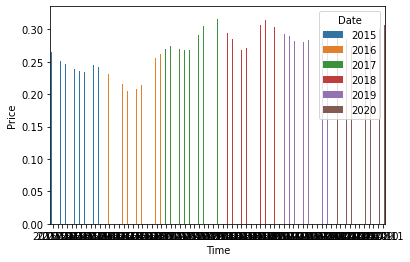

In [4]:
sns.barplot(x='Time',y='Price',data=milk_prices,hue='Date')

In [6]:
Milk_products_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 71 non-null     object
 1   Liquid Milk Production     71 non-null     object
 2   Cream Production           71 non-null     object
 3   Cheddar Cheese Production  71 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [7]:
Milk_products_production['Cheddar Cheese Production']=Milk_products_production['Cheddar Cheese Production'].apply(lambda x: x.replace(',','.'))
Milk_products_production['Cheddar Cheese Production']=Milk_products_production['Cheddar Cheese Production'].astype('float')



In [8]:
milk_prices['Cheddar Cheese Production']=Milk_products_production['Cheddar Cheese Production']

In [9]:
milk_prices['Cost']=milk_prices['Cheddar Cheese Production']*1000000*9.5*milk_prices['Price']



In [10]:
annual_cost=pd.DataFrame(milk_prices.groupby('Date')['Cost'].sum())